In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import subprocess

In [2]:
def read_file(filename):
    names, errors, shape = [], [], []
    with open(filename, 'r') as file:
        for line in file:
            # Split the line into its components using whitespace as the delimiter
            parts = line.strip().split()
            # Extract the "name", "val1", and "val2" from the parts list
            names.append(parts[0])
            errors.append(float(parts[1]))
            shape.append(float(parts[2]))
    return names, errors, shape

def checkNumVar(codeNum, varNum):
    # varNum: 1-6, codeNum: 0-63
    for i in range(varNum):
        out = int(codeNum%2)
        codeNum = int(codeNum/2)
    return out


def getCodeNumsWithVars(vars, numTotVars=7):
    codeNums = []
    for i in range(2**numTotVars):
        lst = []
        for v in vars:
            lst.append(checkNumVar(i, v))
        if (all(num == 1 for num in lst)):
            codeNums.append(i)
    return codeNums


def getCodeNumsNumVars(numVars, numTotVars=7):
    codeNums = []
    for i in range(2**numTotVars):
        lst = []
        for v in range(1, numTotVars+1):
            lst.append(checkNumVar(i, v))
        if (sum(lst) == numVars):
            codeNums.append(i)
    return codeNums

def getVarsFromCode(code):
    vars = []
    count = 0
    while code > 0:
        count += 1
        if(code%2):
            vars.append(count)
        code = int(code/2)
    return vars

def colorScale(hexColor1, hexColor2, numColors=2):
    out = []
    hexColor1, hexColor2 = hexColor1.lstrip('#'), hexColor2.lstrip('#')
    r1, g1, b1 = int(hexColor1[0:2], 16), int(hexColor1[2:4], 16), int(hexColor1[4:6], 16)
    r2, g2, b2 = int(hexColor2[0:2], 16), int(hexColor2[2:4], 16), int(hexColor2[4:6], 16)
    slope_r, slope_g, slope_b = (r2-r1)/(numColors-1), (g2-g1)/(numColors-1), (b2-b1)/(numColors-1)
    for i in range(numColors):
        out.append("#" + "{:02x}".format(int(r1+i*slope_r)).upper() + "{:02x}".format(int(g1+i*slope_g)).upper() + "{:02x}".format(int(b1+i*slope_b)).upper())
    return out

In [5]:
#subprocess.run("bash joinRMSfiles.sh", shell=True, capture_output=True, text=True)
forbidden = ["v2","v3","v8","v10","v11","v12","v13","v14","v15","v18","v25","v26","v27","v37","v38","v39","v52","v54",]
forbidden += ["v33", "v19", "v50", "v30", "v53", "v47", "v48", "v46"]

arrs = read_file("eval_all.out")
errors_filt = [el for el, name in zip(arrs[1], arrs[0]) if not any(n in name.split("_") for n in forbidden)]
shapes_filt = [el for el, name in zip(arrs[2], arrs[0]) if not any(n in name.split("_") for n in forbidden)]
names_filt = [el for el, name in zip(arrs[0], arrs[0]) if not any(n in name.split("_") for n in forbidden)]
print(len(arrs[0]), len(arrs), len(names_filt))
reco_names, reco_errors, reco_shape = [], [], []
df_names, df_errors, df_shape = [], [], []
df15_onevar_names, df15_onevar_errors, df15_onevar_shape = [], [], []
df15_twovar_names, df15_twovar_errors, df15_twovar_shape = [], [], []
df47_onevar_names, df47_onevar_errors, df47_onevar_shape = [], [], []
df47_twovar_names, df47_twovar_errors, df47_twovar_shape = [], [], []
df79_onevar_names, df79_onevar_errors, df79_onevar_shape = [], [], []
df79_twovar_names, df79_twovar_errors, df79_twovar_shape = [], [], []
df111_onevar_names, df111_onevar_errors, df111_onevar_shape = [], [], []
df111_twovar_names, df111_twovar_errors, df111_twovar_shape = [], [], []

df15_threevar_names, df15_threevar_errors, df15_threevar_shape = [], [], []
df47_threevar_names, df47_threevar_errors, df47_threevar_shape = [], [], []
#for n, e, s in zip(arrs[0], arrs[1], arrs[2]):
for n, e, s in zip(names_filt, errors_filt, shapes_filt):
    if n == "RECO":
        reco_names.append(n)
        reco_errors.append(e)
        reco_shape.append(s)
    if len(n.split("_")) == 3 and n.split("_")[2] == "dl511": #0var
        df_names.append(n)
        df_errors.append(e)
        df_shape.append(s)
    if len(n.split("_")) == 4 and n.split("_")[2] == "dl511": #1var
        if n.split("_")[1] == "df15":
            df15_onevar_names.append(n)
            df15_onevar_errors.append(e)
            df15_onevar_shape.append(s)
        elif n.split("_")[1] == "df47":
            df47_onevar_names.append(n)
            df47_onevar_errors.append(e)
            df47_onevar_shape.append(s)
        elif n.split("_")[1] == "df79":
            df79_onevar_names.append(n)
            df79_onevar_errors.append(e)
            df79_onevar_shape.append(s)
        elif n.split("_")[1] == "df111":
            df111_onevar_names.append(n)
            df111_onevar_errors.append(e)
            df111_onevar_shape.append(s)
    if len(n.split("_")) == 5 and n.split("_")[2] == "dl511": #2var
        if n.split("_")[1] == "df15":
            df15_twovar_names.append(n)
            df15_twovar_errors.append(e)
            df15_twovar_shape.append(s)
        elif n.split("_")[1] == "df47":
            df47_twovar_names.append(n)
            df47_twovar_errors.append(e)
            df47_twovar_shape.append(s)
        elif n.split("_")[1] == "df79":
            df79_twovar_names.append(n)
            df79_twovar_errors.append(e)
            df79_twovar_shape.append(s)
        elif n.split("_")[1] == "df111":
            df111_twovar_names.append(n)
            df111_twovar_errors.append(e)
            df111_twovar_shape.append(s)
    if len(n.split("_")) == 6 and n.split("_")[2] == "dl511": #3var
        if n.split("_")[1] == "df15":
            df15_threevar_names.append(n)
            df15_threevar_errors.append(e)
            df15_threevar_shape.append(s)
        if n.split("_")[1] == "df47":
            df47_threevar_names.append(n)
            df47_threevar_errors.append(e)
            df47_threevar_shape.append(s)
    
print("reco_errors", len(reco_errors))
print("df_errors", len(df_errors))
print("df15_onevar_errors", len(df15_onevar_errors))
print("df15_twovar_errors", len(df15_twovar_errors))
print("df47_onevar_errors", len(df47_onevar_errors))
print("df47_twovar_errors", len(df47_twovar_errors))
print("df79_onevar_errors", len(df79_onevar_errors))
print("df79_twovar_errors", len(df79_twovar_errors))
print("df111_onevar_errors", len(df111_onevar_errors))
print("df111_twovar_errors", len(df111_twovar_errors))
print("df15_threevar_errors", len(df15_threevar_errors))
print("df47_threevar_errors", len(df47_threevar_errors))

13597 3 9177
reco_errors 1
df_errors 128
df15_onevar_errors 29
df15_twovar_errors 406
df47_onevar_errors 29
df47_twovar_errors 406
df79_onevar_errors 29
df79_twovar_errors 406
df111_onevar_errors 29
df111_twovar_errors 406
df15_threevar_errors 3654
df47_threevar_errors 3654


In [6]:
print(colorScale("#CC0000", "#000000", 5))

['#CC0000', '#990000', '#660000', '#330000', '#000000']


df15 [1, 2, 3, 4]
BDTG_df15_dl511_v1_v35	3.2784684385870104	223.61725939861296
BDTG_df15_dl511_v1_v5	3.327435769160745	213.03130118422823
BDTG_df15_dl511_v1_v6	3.38145504400703	211.4305757762973
BDTG_df47_dl511_v35	3.1241799741076206	174.40748244084782
BDTG_df47_dl511_v36	3.1606159156513423	171.18785069960558


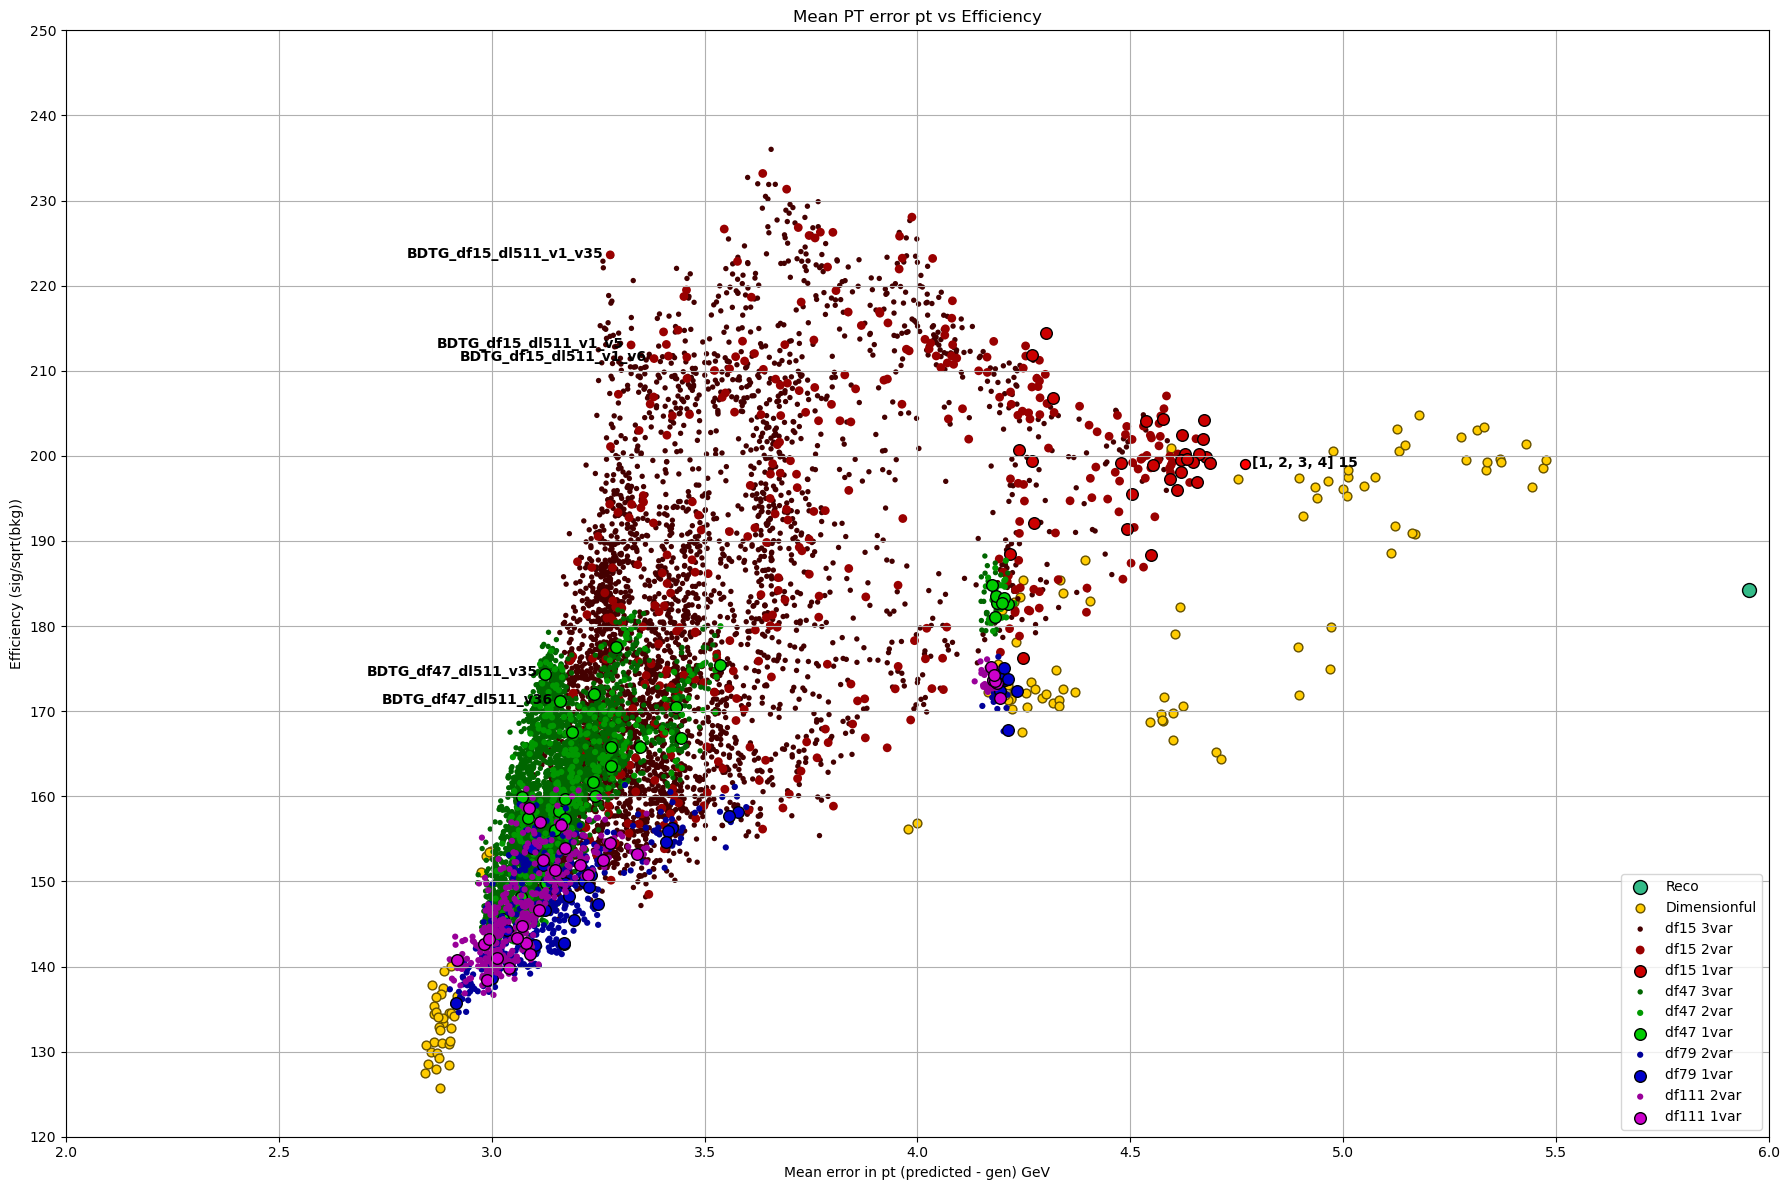

BDTG_df80_dl511 2.8445803184527687 127.46789132270185


In [19]:
plt.figure(figsize=(18, 12))

plt.scatter(reco_errors, reco_shape, color="#33bb88", label='Reco', s=100, alpha=1.0, edgecolor="#000000")
plt.scatter(df_errors, df_shape, color="#ffcc00", label='Dimensionful', s=40, alpha=1.0, edgecolor="#665100")

plt.scatter(df15_threevar_errors, df15_threevar_shape, color="#440000", label='df15 3var', s=15, alpha=1.0, edgecolor="none")
plt.scatter(df15_twovar_errors, df15_twovar_shape, color="#990000", label='df15 2var', s=40, alpha=1.0, edgecolor="none")
plt.scatter(df15_onevar_errors, df15_onevar_shape, color="#CC0000", label='df15 1var', s=70, alpha=1.0, edgecolor="#000000")

plt.scatter(df47_threevar_errors, df47_threevar_shape, color="#006600", label='df47 3var', s=15, alpha=1.0, edgecolor="none")
plt.scatter(df47_twovar_errors, df47_twovar_shape, color="#009900", label='df47 2var', s=20, alpha=1.0, edgecolor="none")
plt.scatter(df47_onevar_errors, df47_onevar_shape, color="#00CC00", label='df47 1var', s=70, alpha=1.0, edgecolor="#000000")

plt.scatter(df79_twovar_errors, df79_twovar_shape, color="#000099", label='df79 2var', s=20, alpha=1.0, edgecolor="none")
plt.scatter(df79_onevar_errors, df79_onevar_shape, color="#0000CC", label='df79 1var', s=70, alpha=1.0, edgecolor="#000000")

plt.scatter(df111_twovar_errors, df111_twovar_shape, color="#990099", label='df111 2var', s=20, alpha=1.0, edgecolor="none")
plt.scatter(df111_onevar_errors, df111_onevar_shape, color="#CC00CC", label='df111 1var', s=70, alpha=1.0, edgecolor="#000000")



for i, label in enumerate(df_names):
    if ((label.split("_")[1] == "df15")):
        print(label.split("_")[1], getVarsFromCode(int(label.split("_")[1].replace("df", ""))))
        plt.annotate(str(getVarsFromCode(int(label.split("_")[1].replace("df", "")))) + " " + label.split("_")[1].replace("df", ""), (df_errors[i], df_shape[i]), textcoords="offset points", xytext=(5,-2), ha='left', weight='bold')
        plt.scatter(df_errors[i], df_shape[i], color="#ff0000", s=50, alpha=1.0, edgecolor="#000000")
    '''if ((label.split("_")[1] == "df47")):
        print(label.split("_")[1], getVarsFromCode(int(label.split("_")[1].replace("df", ""))))
        plt.annotate(str(getVarsFromCode(int(label.split("_")[1].replace("df", "")))) + " " + label.split("_")[1].replace("df", ""), (df_errors[i], df_shape[i]), textcoords="offset points", xytext=(5,-2), ha='left', weight='bold')
        plt.scatter(df_errors[i], df_shape[i], color="#00FF00", s=50, alpha=1.0, edgecolor="#000000")
    if ((label.split("_")[1] == "df79")):
        print(label.split("_")[1], getVarsFromCode(int(label.split("_")[1].replace("df", ""))))
        plt.annotate(str(getVarsFromCode(int(label.split("_")[1].replace("df", "")))) + " " + label.split("_")[1].replace("df", ""), (df_errors[i], df_shape[i]), textcoords="offset points", xytext=(5,-2), ha='left', weight='bold')
        plt.scatter(df_errors[i], df_shape[i], color="#5555FF", s=50, alpha=1.0, edgecolor="#000000")
    if ((label.split("_")[1] == "df111")):
        print(label.split("_")[1], getVarsFromCode(int(label.split("_")[1].replace("df", ""))))
        plt.annotate(str(getVarsFromCode(int(label.split("_")[1].replace("df", "")))) + " " + label.split("_")[1].replace("df", ""), (df_errors[i], df_shape[i]), textcoords="offset points", xytext=(5,-2), ha='left', weight='bold')
        plt.scatter(df_errors[i], df_shape[i], color="#FF00FF", s=50, alpha=1.0, edgecolor="#000000")'''

'''for i, label in enumerate(df15_onevar_names):
    if (df15_onevar_errors[i] < 4.0):
        plt.annotate(label.split("_")[-1], (df15_onevar_errors[i], df15_onevar_shape[i]), textcoords="offset points", xytext=(5,-2), ha='left', weight='bold')
for i, label in enumerate(df47_onevar_names):
    if (df47_onevar_errors[i] < 4.0):
        plt.annotate(label.split("_")[-1], (df47_onevar_errors[i], df47_onevar_shape[i]), textcoords="offset points", xytext=(5,-2), ha='left', weight='bold')
  '''

#for n, e, s in zip(arrs[0], arrs[1], arrs[2]):
for n, e, s in zip(names_filt, errors_filt, shapes_filt):
    if (e < 3.3 and s > 230.0):
        #plt.annotate(n, (e, s), textcoords="offset points", xytext=(-2,-2), ha='right', fontsize=8)
        print("{}\t{}\t{}".format(n, e, s))

for n, e, s in zip(df15_twovar_names, df15_twovar_errors, df15_twovar_shape):
    if (e < 3.4 and s > 210.0):
        plt.annotate(n, (e, s), textcoords="offset points", xytext=(-5,-2), ha='right', fontsize=10, weight='bold')
        print("{}\t{}\t{}".format(n, e, s))

for n, e, s in zip(df47_onevar_names, df47_onevar_errors, df47_onevar_shape):
    if (e < 3.2 and s > 170.0):
        plt.annotate(n, (e, s), textcoords="offset points", xytext=(-5,-2), ha='right', fontsize=10, weight='bold')
        print("{}\t{}\t{}".format(n, e, s))
'''
for n, e, s in zip(df111_onevar_names, df111_onevar_errors, df111_onevar_shape):
    if (e < 3.0 and s > 100.0):
        plt.annotate(n, (e, s), textcoords="offset points", xytext=(-2,-2), ha='right', fontsize=8)
        print("{}\t{}\t{}".format(n, e, s))'''

plt.xlabel('Mean error in pt (predicted - gen) GeV')
plt.ylabel('Efficiency (sig/sqrt(bkg))')
plt.title('Mean PT error pt vs Efficiency')
xmin, xmax, xsep = 2.0, 6, 0.5
#xmin, xmax, xsep = 6.2, 6.35, 0.01
ymin, ymax, ysep = 120, 250, 10
#ymin, ymax, ysep = 172, 180, 1
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.yticks(np.arange(ymin, ymax+0.001, ysep))
plt.xticks(np.arange(xmin, xmax+0.001, xsep))
plt.grid()
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
print(arrs[0][np.argmin(arrs[1])], arrs[1][np.argmin(arrs[1])], arrs[2][np.argmin(arrs[1])])

In [156]:
dicPoints = {}
totalshapesOne, totalshapesTwo, totalerrorsOne, totalerrorsTwo = [], [], [], []
for var in range(55):
    c=0
    #for n, e, s in zip(arrs[0], arrs[1], arrs[2]):
    for n, e, s in zip(names_filt, errors_filt, shapes_filt):
        if "v{}".format(var) in n.split("_") and len(n.split("_")) == 5:
            c += 1
            totalshapesTwo.append(s)
            totalerrorsTwo.append(e)
            #plt.scatter(e, s, color="#ff6600", s=20, alpha=1.0, edgecolor="none")

    #for n, e, s in zip(arrs[0], arrs[1], arrs[2]):
    for n, e, s in zip(names_filt, errors_filt, shapes_filt):
        if "v{}".format(var) in n.split("_") and len(n.split("_")) == 4:
            c += 1
            totalshapesOne.append(s)
            totalerrorsOne.append(e)



for var in range(55):

    #plt.figure(figsize=(12, 8))
    #plt.scatter(reco_errors, reco_shape, color="#33bb88", label='Reco', s=100, alpha=1.0, edgecolor="#000000")

    #plt.scatter(df15_twovar_errors, df15_twovar_shape, color="#aaaaaa", label='df15 2var', s=20, alpha=1.0, edgecolor="none")
    #plt.scatter(df15_onevar_errors, df15_onevar_shape, color="#aaaaaa", label='df15 1var', s=70, alpha=1.0, edgecolor="none")
    #plt.scatter(df47_twovar_errors, df47_twovar_shape, color="#aaaaaa", label='df47 2var', s=20, alpha=1.0, edgecolor="none")
    #plt.scatter(df47_onevar_errors, df47_onevar_shape, color="#aaaaaa", label='df47 1var', s=70, alpha=1.0, edgecolor="none")
    #plt.scatter(df79_twovar_errors, df79_twovar_shape, color="#aaaaaa", label='df79 2var', s=20, alpha=1.0, edgecolor="none")
    #plt.scatter(df79_onevar_errors, df79_onevar_shape, color="#aaaaaa", label='df79 1var', s=70, alpha=1.0, edgecolor="none")
    #plt.scatter(df111_twovar_errors, df111_twovar_shape, color="#aaaaaa", label='df111 2var', s=20, alpha=1.0, edgecolor="none")
    #plt.scatter(df111_onevar_errors, df111_onevar_shape, color="#aaaaaa", label='df111 1var', s=70, alpha=1.0, edgecolor="none")
    shapesOne, shapesTwo, errorsOne, errorsTwo = [], [], [], []
    c=0
    #for n, e, s in zip(arrs[0], arrs[1], arrs[2]):
    for n, e, s in zip(names_filt, errors_filt, shapes_filt):
        if "v{}".format(var) in n.split("_") and len(n.split("_")) == 5:
            c += 1
            shapesTwo.append(s)
            errorsTwo.append(e)
            #plt.scatter(e, s, color="#ff6600", s=20, alpha=1.0, edgecolor="none")

    #for n, e, s in zip(arrs[0], arrs[1], arrs[2]):
    for n, e, s in zip(names_filt, errors_filt, shapes_filt):
        if "v{}".format(var) in n.split("_") and len(n.split("_")) == 4:
            c += 1
            shapesOne.append(s)
            errorsOne.append(e)
            #plt.scatter(e, s, color="#ff6600", s=50, alpha=1.0, edgecolor="#000000")

    #plt.xlabel('Mean error in pt (predicted - gen) GeV')
    #plt.ylabel('Efficiency (sig/sqrt(bkg))')
    #plt.title('Mean PT error pt vs Efficiency')
    xmin, xmax, xsep = 2.0, 6, 0.5
    #xmin, xmax, xsep = 6.2, 6.35, 0.01
    ymin, ymax, ysep = 120, 250, 10
    #ymin, ymax, ysep = 172, 180, 1
    #plt.xlim(xmin, xmax)
    #plt.ylim(ymin, ymax)
    #plt.yticks(np.arange(ymin, ymax+0.001, ysep))
    #plt.xticks(np.arange(xmin, xmax+0.001, xsep))
    #plt.grid()
    #plt.legend(loc='lower right')
    #plt.tight_layout()
    if c > 0:
        #plt.savefig('/home/submit/pdmonte/public_html/plotsVars/vars{}.png'.format(var))
        print("{}".format(var))
        shapesOne, shapesTwo, errorsOne, errorsTwo = np.asarray(shapesOne), np.asarray(shapesTwo), np.asarray(errorsOne), np.asarray(errorsTwo)
        dicPoints[var] = np.array([shapesOne[0]/np.mean(totalshapesOne), shapesOne[1]/np.mean(totalshapesOne), shapesOne[2]/np.mean(totalshapesOne), shapesOne[3]/np.mean(totalshapesOne), errorsOne[0]/np.mean(totalerrorsOne), errorsOne[1]/np.mean(totalerrorsOne), errorsOne[2]/np.mean(totalerrorsOne), errorsOne[3]/np.mean(totalerrorsOne), np.min(shapesOne)/np.mean(totalshapesOne), np.max(shapesOne)/np.mean(totalshapesOne), np.mean(shapesOne)/np.mean(totalshapesOne), np.std(shapesOne)/np.mean(totalshapesOne), np.min(shapesTwo)/np.mean(totalshapesTwo), np.max(shapesTwo)/np.mean(totalshapesTwo), np.mean(shapesTwo)/np.mean(totalshapesTwo), np.std(shapesTwo)/np.mean(totalshapesTwo), np.min(errorsOne)/np.mean(totalerrorsOne), np.max(errorsOne)/np.mean(totalerrorsOne), np.mean(errorsOne)/np.mean(totalerrorsOne), np.std(errorsOne)/np.mean(totalerrorsOne), np.min(errorsTwo)/np.mean(totalerrorsTwo), np.max(errorsTwo)/np.mean(totalerrorsTwo), np.mean(errorsTwo)/np.mean(totalerrorsTwo), np.std(errorsTwo)/np.mean(totalerrorsTwo)])


def getClosestN(dict, key):
    outs = []
    for k in dict.keys():
        outs.append([k, np.linalg.norm(dict[k] - dict[key])])
    return sorted(outs, key=lambda x: x[1])


0
1
4
5
6
7
9
16
17
20
21
22
23
24
28
29
31
32
34
35
36
40
41
42
43
44
45
49
51


In [157]:
minDist = 9
minKeys = [-1, -1]

for k in dicPoints.keys():
    l = getClosestN(dicPoints, k)
    if l[1][1] < minDist:
        minDist = l[1][1]
        minKeys = [k, l[1][0]]
    print(k, l[:3], l[1][1])

print(minDist, minKeys)

0 [[0, 0.0], [29, 0.06903438949595074], [28, 0.08276145552208551]] 0.06903438949595074
1 [[1, 0.0], [20, 0.08032828898575528], [17, 0.13838032133495679]] 0.08032828898575528
4 [[4, 0.0], [28, 0.06807201509384582], [31, 0.0875687810044816]] 0.06807201509384582
5 [[5, 0.0], [6, 0.061299238682791454], [32, 0.11463922380256293]] 0.061299238682791454
6 [[6, 0.0], [5, 0.061299238682791454], [32, 0.0806153310213802]] 0.061299238682791454
7 [[7, 0.0], [16, 0.08571714504586118], [21, 0.11248633912606007]] 0.08571714504586118
9 [[9, 0.0], [17, 0.18312209356785072], [20, 0.23139842003401687]] 0.18312209356785072
16 [[16, 0.0], [7, 0.08571714504586118], [21, 0.1441904388154635]] 0.08571714504586118
17 [[17, 0.0], [20, 0.0905263888751173], [1, 0.13838032133495679]] 0.0905263888751173
20 [[20, 0.0], [1, 0.08032828898575528], [17, 0.0905263888751173]] 0.08032828898575528
21 [[21, 0.0], [7, 0.11248633912606007], [16, 0.1441904388154635]] 0.11248633912606007
22 [[22, 0.0], [4, 0.09997328817888956], [44